In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

#### Вопросы:
a. Какой рекламный канал принёс больше всего дохода за всё время? 

b. Как изменился средний чек транзакции после введения коронавирусных ограничений?  Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated») 

c. Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни? 

d. Вам необходимо спрогнозировать объем дохода, полученного с пользователей,  приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед. 
Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам понадобятся? 

#### Какой рекламный канал принёс больше всего дохода за всё время? Ответ: Яндекс

In [3]:
df = pd.read_csv('summer_camp_data.csv')
df

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52716,2020-06-21,(direct),(none),Доставка есть,Мобайл,yes,yes,65,4,250,50,58,4,4821.0
52717,2020-08-09,co-promo,email,Доставка есть,Мобайл,no,no,43,2,250,50,23,1,7348.0
52718,2020-09-22,google,cpc,Доставка есть,Мобайл,yes,yes,153,3,250,50,58,1,958.0
52719,2020-08-25,(direct),(none),Не определено,Мобайл,yes,yes,219,8,250,50,45,1,828.0


<AxesSubplot:xlabel='source'>

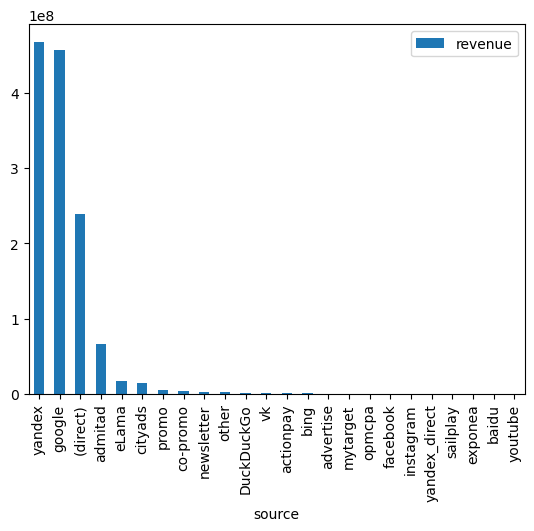

In [4]:
df.groupby('source').agg(
    revenue=pd.NamedAgg(column='revenue', aggfunc='sum')).sort_values(
    by=['revenue'], ascending=False).plot(kind='bar')

#### Как изменился средний чек транзакции после введения коронавирусных ограничений? Ответ: В 1.08 раз средний чек выше без ограничений из-за коронавируса

Создадим 2 новые колонки: средний чек на каждый день и колонку corona_limits (есть или нет ограничения в этот день). 
Дни ограничений в промежутке с '2020-03-15' до '2022-07-02'

In [5]:
df['average_check'] = df['revenue']/df['transactions']

In [6]:
df['corona_limits'] = np.where((df['date'] > '2020-03-15') & (df['date'] <= '2022-07-02'), True, False)
df

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,average_check,corona_limits
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,962.766667,True
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,1126.626728,True
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,1051.500000,True
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,1112.718310,True
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,997.758065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52716,2020-06-21,(direct),(none),Доставка есть,Мобайл,yes,yes,65,4,250,50,58,4,4821.0,1205.250000,True
52717,2020-08-09,co-promo,email,Доставка есть,Мобайл,no,no,43,2,250,50,23,1,7348.0,7348.000000,True
52718,2020-09-22,google,cpc,Доставка есть,Мобайл,yes,yes,153,3,250,50,58,1,958.0,958.000000,True
52719,2020-08-25,(direct),(none),Не определено,Мобайл,yes,yes,219,8,250,50,45,1,828.0,828.000000,True


In [7]:
mean_with_corona = df[df['corona_limits'] == True].average_check.mean()
mean_with_corona

1193.6272879539629

In [8]:
mean_without_corona = df[df['corona_limits'] == False].average_check.mean()
mean_without_corona

1292.789925364841

In [9]:
difference = round(mean_without_corona / mean_with_corona * 100, 2)
print('В {} раз средний чек выше без ограничений из-за коронавируса'.format(difference))

В 108.31 раз средний чек выше без ограничений из-за коронавируса


#### Как средний чек изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

In [10]:
# Средний чек с промокодом и с короновирусом: 
promo_yes_corona_yes = df[(df['corona_limits'] == True) & (df['promo_activated'] == 'yes')].average_check.mean()

In [11]:
# Средний чек с промокодом и без коронавируса: 
promo_yes_corona_no = df[(df['corona_limits'] == False) & (df['promo_activated'] == 'yes')].average_check.mean()

In [12]:
print('Пользователи с промокодом стали покупать в {} % меньше во времен коронавируса'.format(
    round((1-promo_yes_corona_yes/promo_yes_corona_no) * 100, 2)))

Пользователи с промокодом стали покупать в 5.45 % меньше во времен коронавируса


In [13]:
# Средний чек без промокода и с короновирусом: 
promo_no_corona_yes = df[(df['corona_limits'] == True) & (df['promo_activated'] == 'no')].average_check.mean()

In [14]:
# Средний чек без промокода и без коронавируса:
promo_no_corona_no = df[(df['corona_limits'] == False) & (df['promo_activated'] == 'no')].average_check.mean()

In [15]:
print('Пользователи без промокода стали покупать в {} % меньше во времен коронавируса'.format(
    round((1-promo_no_corona_yes/promo_no_corona_no) * 100, 2)))

Пользователи без промокода стали покупать в 9.9 % меньше во времен коронавируса


#### Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни? Ответ: да, p-value < 0,05

In [16]:
df['dayOfWeek'] = pd.to_datetime(df['date']).dt.dayofweek

In [17]:
addToCart_workday = df[(df['dayOfWeek'] >= 0) & (df['dayOfWeek'] < 5)].addToCart.sum()
addToCart_workday

6333926

In [18]:
transactions_workday = df[(df['dayOfWeek'] >= 0) & (df['dayOfWeek'] < 5)].transactions.sum()
transactions_workday

691164

In [19]:
addToCart_weekday = df[(df['dayOfWeek'] == 5) | (df['dayOfWeek'] == 6)].addToCart.sum()
addToCart_weekday

3049076

In [20]:
transactions_weekday = df[(df['dayOfWeek'] == 5) | (df['dayOfWeek'] == 6)].transactions.sum()
transactions_weekday

367813

In [21]:
from statsmodels.stats.proportion import proportions_ztest

# транзакции
count = np.array([transactions_workday, transactions_weekday]) 

# добавление в корзину
nobs = np.array([addToCart_workday, addToCart_weekday])

stat, pval = proportions_ztest(count, nobs)
print('p_value: {:0.5f}'.format(pval))

p_value: 0.00000


p-value < .00001, а это значит, что с уверенностью в 95% мы можем сказать сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни

In [22]:
x = df.visits
y = df.transactions
import scipy.stats
scipy.stats.pearsonr(x, y)[0] 

0.5866817626317747

Присутствует средняя корреляция между визитами и транзакциями в 0,6 величины коэффициента корреляции